<a href="https://colab.research.google.com/github/kikemarti/Bringing-Old-Photos-Back-to-Life/blob/master/Bringing_Old_Photo_Back_to_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#◢ Bringing Old Photos Back to Life

This is a reference implementation of our CVPR 2020 paper [1], which  revives an old photo to modern style. Should you be making use of our work, please cite our paper [1].



---


#◢ Verify Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone


In [1]:
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 509 (delta 3), reused 5 (delta 1), pack-reused 501
Receiving objects: 100% (509/509), 40.91 MiB | 16.77 MiB/s, done.
Resolving deltas: 100% (227/227), done.


#◢ Set up the environment


In [2]:
# pull the syncBN repo
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd Face_Enhancement/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Face_Enhancement/checkpoints.zip
!unzip checkpoints.zip
%cd ../

%cd Global/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Global/checkpoints.zip
!unzip checkpoints.zip
%cd ../

/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 15.73 MiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Face_Detection
--2023-01-06 10:00:30--  http://dlib.net/files/shape_predictor_68_face_landma

In [3]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 166.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 KB 43.3 MB/s eta 0:00:00


#◢ Run the code

### Restore photos (normal mode)

In [6]:
%cd /content/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.makedirs(output_path, exist_ok=True)

!python run.py --input_folder /content/photo_restoration/test_images/old --output_folder /content/photo_restoration/output/ --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
./checkpoints/restoration/VAE_A_quality/latest_net_G.pth not exists yet!
./checkpoints/restoration/VAE_B_quality/latest_net_G.pth not exists yet!
./checkpoints/restoration/mapping_quality/latest_net_mapping_net.pth not exists yet!
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Now you are processing e.png
Now you are processing f.png
Now you are processing g.png
Now you are processing h.png
Finish Stage 1 ...


Running Stage 2: Face Detection
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 0 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish S

In [7]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]
    
    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

a.png


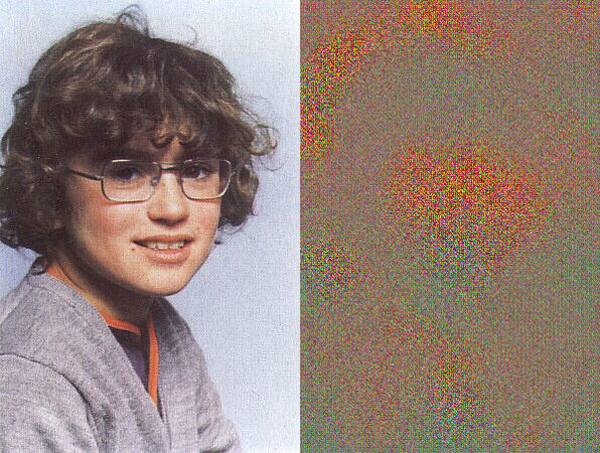

b.png


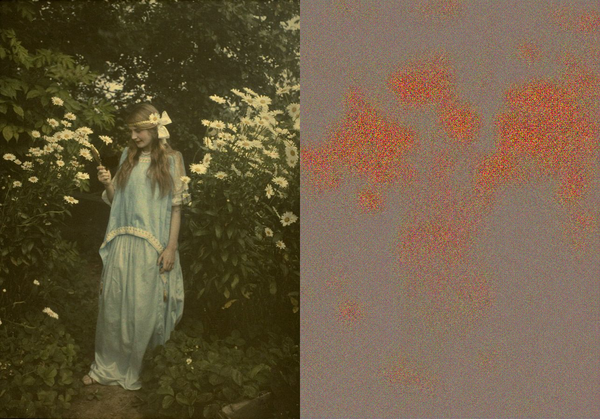

c.png


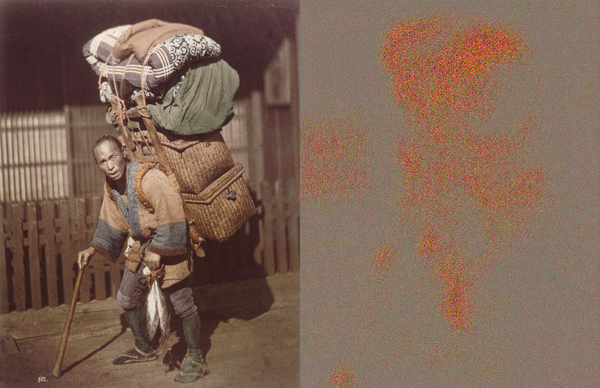

d.png


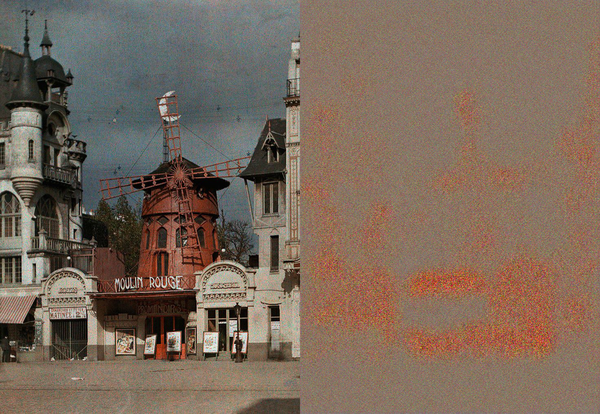

e.png


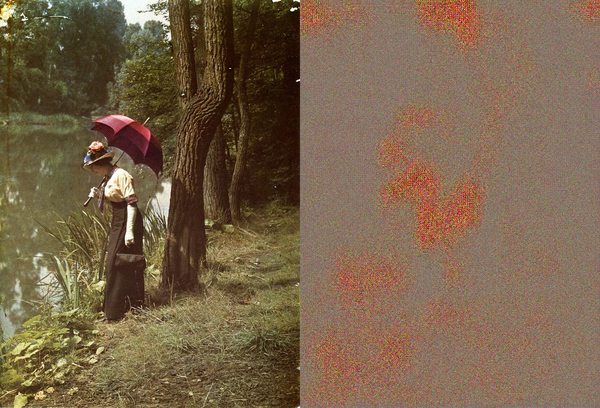

f.png


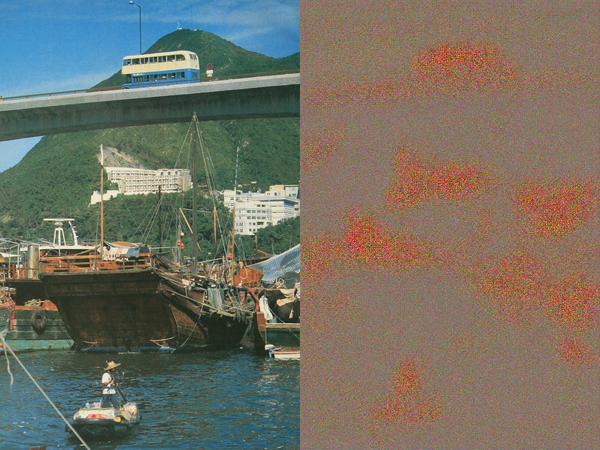

g.png


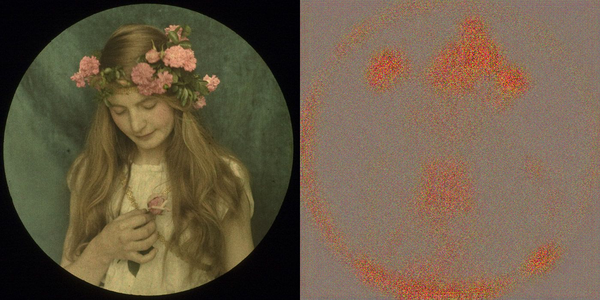

h.png


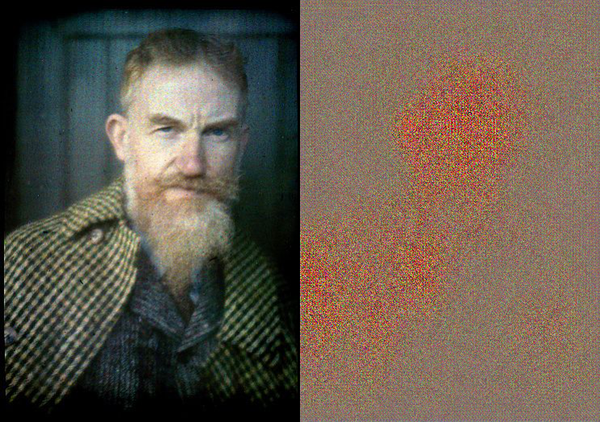

In [8]:
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

### Restore the photos with scratches

In [9]:
!rm -rf /content/photo_restoration/output/*
!python run.py --input_folder /content/photo_restoration/test_images/old_w_scratch/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch

Running Stage 1: Overall restoration
initializing the dataloader
Traceback (most recent call last):
  File "detection.py", line 178, in <module>
    main(config)
  File "detection.py", line 92, in main
    checkpoint = torch.load(checkpoint_path, map_location="cpu")
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 771, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 270, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 251, in __init__
    super(_open_file, self).__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/detection/FT_Epoch_latest.pt'
You are using NL + Res
./checkpoints/restoration/VAE_A_quality/latest_net_G.pth not exists yet!
./checkpoints/restoration/VAE_B_scratch/latest_net_G.pth not exists yet!
./checkpoints/restoration/mappi

In [10]:
input_folder = "test_images/old_w_scratch"
output_folder = "output"
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

a.png


FileNotFoundError: ignored

#◢ Try it on your own photos!

In [ ]:
from google.colab import files
import shutil

upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

uploaded = files.upload()
for filename in uploaded.keys():
    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

Run the processing with:

In [ ]:
!python run.py --input_folder /content/photo_restoration/test_images/upload --output_folder /content/photo_restoration/upload_output --GPU 0 --with_scratch --HR

### Visualize

Now you have all your results under the folder `upload_output` and you can *manually* right click and download them.

Here we use the child photos of celebrities from https://www.boredpanda.com/childhood-celebrities-when-they-were-young-kids/?utm_source=google&utm_medium=organic&utm_campaign=organic 

In [ ]:
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "final_output", filename_output))

    display(make_grid(image_original, image_restore))
    print("")

## Download your results



In [ ]:
output_folder = os.path.join(upload_output_path, "final_output")
print(output_folder)
os.system(f"zip -r -j download.zip {output_folder}/*")
files.download("download.zip")